In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy.special

In [3]:
import numpy as np

class neuralNetwork:
    
    # 신경망 초기화 기능
    # 입력, 은닉, 출력 계층에서 각 노드의 개수를 몇개로 할지 정해야함
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes=input_nodes
        self.hnodes=hidden_nodes
        self.onodes=output_nodes
        self.lr=learning_rate
        
    # 가중치는 행렬로 표현        
    # 입력/은닉 사이 가중치 행렬 형식 : (은닉노드 * 입력노드 )
    # 은닉/출력 사이 가중치 행렬 형식 : (출력노드 * 은닉노드 )

    # 입력, 은닝 계층 사이의 가중치 행렬
        self.wih=np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes,self.inodes))
        # normal(평균, 표준편차, 개수)
        
        self.who=np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes,self.hnodes))

        self.activation_function=lambda x:scipy.special.expit(x) # sigmoid
        
    # 신경망 학습 기능(2단계)
    # 1단계(forward propagation) : 입력 데이터에 대해서 계산(query)
    # 2단계(backward propagation) : 예측값과 실제값의 차이를 계산 -> 가중치 update
    
    
    
    def train(self, inputs_list, targets_list):
        inputs=np.array(inputs_list, ndmin=2).T
        
        targets=np.array(targets_list, ndmin=2).T
        
        hidden_inputs=np.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=np.dot(self.who, hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        # 오차 = 실제값 - 예측값
        
        # 은닉 계층 노드에 대한 역전파된 오차
        # 은닉 계층의 오차는 가중치에 의해 나온다
        # 출력 계층의 오차들을 재조합하여 계산한다.
        hidden_errors=np.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트(who)
        self.who+=self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #신경망 질의 기능 : 신경망으로 들어오는 입력을 받아 출력을 반환하는 함수
    def query(self, inputs_list):
        # 입력리스트를 2차워 행렬로 변환
        inputs=np.array(inputs_list, ndmin=2).T
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        # 은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who, hidden_outputs)
        
        # 출력계층으로 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
        

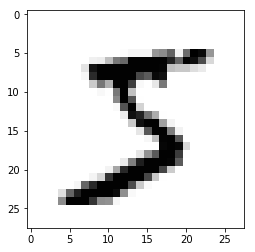

In [4]:
data_file=open('mnist_train_100.csv','r')
data_list=data_file.readlines()
len(data_list) # 길이 : 100
data_list[0] # data_list[0] 길이 = 1846
all_values=data_list[0].split(",")
image_array=np.asfarray(all_values[1:]).reshape(28,28)# 784 -> 28,28
# 문자로 된 숫자 -> 실수로 변환
plt.imshow(image_array, cmap='Greys', interpolation=None)

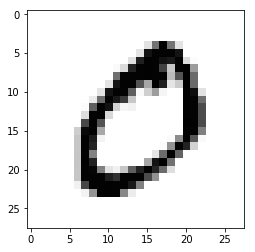

In [5]:
all_values=data_list[1].split(",")
image_array=np.asfarray(all_values[1:]).reshape(28,28)# 784 -> 28,28
# 문자로 된 숫자 -> 실수로 변환
plt.imshow(image_array, cmap='Greys', interpolation=None)

In [6]:
# 0~255 -> 0.01 ~ 1.0
# (0-255)/255*0.99=0~0.99 + 0.01 => 0.01~1
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01

In [7]:
"""
레이블 5에 대한 결과
0     0.00
1     0.01
...
5     0.99
9     0.00
"""

'\n레이블 5에 대한 결과\n0     0.00\n1     0.01\n...\n5     0.99\n9     0.00\n'

In [8]:
onodes=10 # 출력 노드 종류가 10가지
targets=np.zeros(onodes)+0.01
targets[int(all_values[0])]=0.99

In [9]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [10]:
# 입력, 은닉, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10 # 0~9
# tk        Ok          error
# 0         0.05        0.05(e1)
# 0
# 0
# 0
# 0
# 1
# 0
# 0
# 0
# 0         0.05  
# |0.05(10)# 0

#학습률 0.3
learning_rate=0.3

# 신경망 객체 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#mnis 트레이닝 데이터 불러오기
training_data_file=open("mnist_train_100.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

epochs=200
for e in range(epochs):
    
    # 신경망 학습
    for record in training_data_list:
        all_values=record.split(",") 
        inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01 # 0.01 ~ 0.1 로 스케일링
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs, targets)

In [11]:
test_data_file=open("mnist_test_10.csv","r")
test_data_list=test_data_file.readlines()
test_data_file.close()

In [12]:
all_values=test_data_list[0].split(",")
all_values[0] # 첫번째 테스트 데이터 정답 : 7

'7'

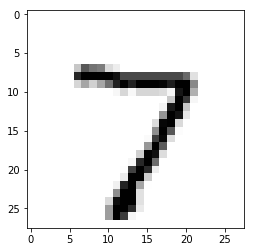

In [13]:
image_array=(np.asfarray(all_values[1:]).reshape(28,28))
plt.imshow(image_array, cmap="Greys")

In [14]:
score_card=[]
for record in test_data_list:
    all_values=record.split(",")
    # 정답
    correct_label=int(all_values[0])
    print(correct_label, ": correct_label")
    
    outputs=n.query(((np.asfarray(all_values[1:]))/255*0.99)+0.01)
    label=np.argmax(outputs)
    print(label, ": my network's answer")
    
    if (label==correct_label):
        score_card.append(1)
    else:
        score_card.append(0)
        
score_card_array=np.asarray(score_card)        
print(score_card_array.sum()/score_card_array.size)


7 : correct_label
7 : my network's answer
2 : correct_label
2 : my network's answer
1 : correct_label
1 : my network's answer
0 : correct_label
0 : my network's answer
4 : correct_label
4 : my network's answer
1 : correct_label
1 : my network's answer
4 : correct_label
9 : my network's answer
9 : correct_label
3 : my network's answer
5 : correct_label
1 : my network's answer
9 : correct_label
9 : my network's answer
0.7


In [15]:
# epoch 1~10 나눠서 테스트



In [16]:
training_data_list=training_data_list[1:]

In [19]:
epochs=range(1,11)
score_card=[]
#for e in epochs:
    #print(e)
    # 신경망 학습

training_data_file=open('mnist-in-csv/mnist_train.csv','r')
test_data_file=open('mnist-in-csv/mnist_test.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()
    
test_data_file=open('mnist-in-csv/mnist_test.csv','r')
testing_data_list=test_data_file.readlines()
test_data_file.close()    

for e in epochs:
    input_nodes=784
    hidden_nodes=100
    output_nodes=10 # 0~9
    learning_rate=0.01

    n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    for record in training_data_list:
        all_values=record.split(",")
        # 정답
        #print(correct_label, ": correct_label")
        inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs, targets)

    
        for record in testing_data_list[1:]:
            all_values=record.split(",")
            correct_label=int(all_values[0])
            outputs=n.query(((np.asfarray(all_values[1:]))/255*0.99)+0.01)
            label=np.argmax(outputs)
                #print(label, ": my network's answer")

            if (label==correct_label):
                score_card.append(1)
            else:
                score_card.append(0)
        score_card_array=np.asarray(score_card)        
        print(score_card_array.sum()/score_card_array.size)

ValueError: could not convert string to float: '1x1'

In [ ]:
len(training_data_list[1:][1:])